# Problem Set 4
* Rafael Martins Guimaraes
## This is a good place to start for pset4


## Problem 1

In [1]:
# Import lots of tools
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

# classification tools
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

# regression tools
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

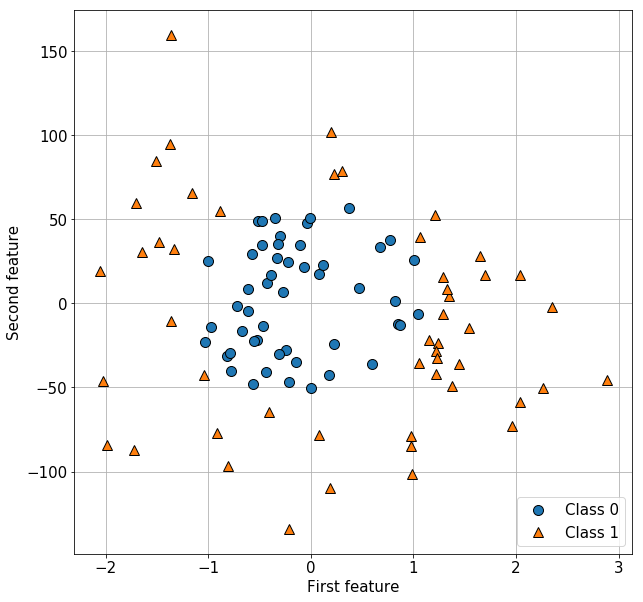

In [2]:
#Problem 1
#Question 1
def makeCircleClass(n):
    X = np.random.normal(size=(n,2),loc=0,scale=1.)
    d = X[:,0]**2. + X[:,1]**2.
    dtype = d > 1.5
    # This line blows up the x [:,1] dimension
    X[:,1]*=50
    y = dtype.astype(int)
    return X,y

X,y = makeCircleClass(100)
# draw points
width = 10
height = 10
plt.figure(figsize=(width, height))
plt.rcParams.update({'font.size':15})
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.grid()

In [3]:
#Question 2
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
svl = LinearSVC(C=100.)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = svl.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print(np.mean(trainScore))
print(np.std(trainScore))
print(np.mean(testScore))
print(np.std(trainScore))

0.5692499999999999
0.07525830518952709
0.5479999999999999
0.07525830518952709


In [4]:
#Question3
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
svnl = SVC(C=1.,kernel='rbf',gamma=1.0)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = svnl.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print(np.mean(trainScore))
print(np.std(trainScore))
print(np.mean(testScore))
print(np.std(trainScore))

0.9927499999999999
0.007537406715840657
0.6609999999999999
0.007537406715840657


In [5]:
#Question4
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
svnl = SVC(C=1.,kernel='rbf',gamma=10.)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = svnl.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print(np.mean(trainScore))
print(np.std(trainScore))
print(np.mean(testScore))
print(np.std(trainScore))

1.0
0.0
0.7210000000000001
0.0


In [6]:
#Question5
Xn = X / X.std(axis=0)
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
svnl = SVC(C=1.,kernel='rbf',gamma=1.)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(Xn,y,test_size=0.2)
    trainFit = svnl.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print(np.mean(trainScore))
print(np.std(trainScore))
print(np.mean(testScore))
print(np.std(trainScore))

1.0
0.0
0.5379999999999999
0.0


In [7]:
#Question6
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
svnl = SVC(kernel='poly',degree=2,gamma=1.0)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = svnl.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print(np.mean(trainScore))
print(np.std(trainScore))
print(np.mean(testScore))
print(np.std(trainScore))

0.99875
0.0037499999999999873
0.987
0.0037499999999999873


In [8]:
#Question7
Xn = X / X.std(axis=0)
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
svnl = SVC(kernel='poly',degree=2,gamma=1.0)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(Xn,y,test_size=0.2)
    trainFit = svnl.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print(np.mean(trainScore))
print(np.std(trainScore))
print(np.mean(testScore))
print(np.std(trainScore))

0.9942499999999999
0.007163274390947188
0.985
0.007163274390947188


## Problem 2

In [9]:
# load default data set
wineall = pd.read_csv("winequality-red.csv")
# toss out id column (1)
X = wineall.values[:,0:11].copy()
y = wineall.quality.values

In [10]:
# display dataframe in nice table just to see
wineall.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Note:Use test_size=0.2 throughout
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

##  Naive Bayes example

In [12]:
# Try a naive Bayes classifier
nbc =  GaussianNB()
trainFit = nbc.fit(X_train,y_train)
yGuess = np.mean(y_train)
# print(trainFit.score(X_train,y_train))
# print(trainFit.score(X_test, y_test))
yhatTrain = trainFit.predict(X_train)
yhatTest  = trainFit.predict(X_test)
mseTrain = np.mean( (y_train-yhatTrain)**2)
mseTest  = np.mean( (y_test -yhatTest) **2)
mseGuessTrain = np.mean( (y_train - yGuess)**2)
mseGuessTest  = np.mean( (y_test  - yGuess)**2)
r2Train = 1. - mseTrain/mseGuessTrain
r2Test  = 1. - mseTest/mseGuessTest
print(mseTrain)
print(r2Train)
print(mseTest)
print(r2Test)

0.7427677873338546
-0.09823909353358151
0.665625
-0.20233163164977896


In [11]:
#Question 2
treec = DecisionTreeClassifier()
trainFit = treec.fit(X_train,y_train)
yGuess = np.mean(y_train)
# print(trainFit.score(X_train,y_train))
# print(trainFit.score(X_test, y_test))
yhatTrain = trainFit.predict(X_train)
yhatTest  = trainFit.predict(X_test)
mseTrain = np.mean( (y_train-yhatTrain)**2)
mseTest  = np.mean( (y_test -yhatTest) **2)
mseGuessTrain = np.mean( (y_train - yGuess)**2)
mseGuessTest  = np.mean( (y_test  - yGuess)**2)
r2Train = 1. - mseTrain/mseGuessTrain
r2Test  = 1. - mseTest/mseGuessTest
print(mseTrain)
print(r2Train)
print(mseTest)
print(r2Test)

0.0
1.0
0.25
0.01538461538461533


In [13]:
#Question 3
#For this problem, a regression like model is more suitable because
#the the value of dependent variable y in this case do make sense，even
#though the y is discrete. For example, when the y is getting bigger, it
#is indicating that the quality of the wine is getting either better or 
#worse. Therefore, it makes more sense to make it a regression like model.

In [14]:
#Question 4
nmc = 50
train_scores = np.zeros(nmc)
test_scores = np.zeros(nmc)
lr = LinearRegression()
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = lr.fit(X_train,y_train)
    yGuess = np.mean(y_train)
    yhatTrain = trainFit.predict(X_train)
    yhatTest  = trainFit.predict(X_test)
    mseTrain = np.mean( (y_train-yhatTrain)**2)
    mseTest  = np.mean( (y_test -yhatTest) **2)
    mseGuessTrain = np.mean( (y_train - yGuess)**2)
    mseGuessTest  = np.mean( (y_test  - yGuess)**2)
    r2Train = 1. - mseTrain/mseGuessTrain
    r2Test  = 1. - mseTest/mseGuessTest
    train_scores[i] = r2Train
    test_scores[i] = r2Test
print(np.mean(train_scores))
print(np.mean(test_scores))

0.361598926122652
0.34648932287947404


In [17]:
#Question 5
nmc = 50
train_scores = np.zeros(nmc)
test_scores = np.zeros(nmc)
tr = DecisionTreeRegressor(max_depth=5)
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = tr.fit(X_train,y_train)
    yGuess = np.mean(y_train)
    yhatTrain = trainFit.predict(X_train)
    yhatTest  = trainFit.predict(X_test)
    mseTrain = np.mean( (y_train-yhatTrain)**2)
    mseTest  = np.mean( (y_test -yhatTest) **2)
    mseGuessTrain = np.mean( (y_train - yGuess)**2)
    mseGuessTest  = np.mean( (y_test  - yGuess)**2)
    r2Train = 1. - mseTrain/mseGuessTrain
    r2Test  = 1. - mseTest/mseGuessTest
    train_scores[i] = r2Train
    test_scores[i] = r2Test
print("Depth: 5")
print(np.mean(train_scores))
print(np.mean(test_scores))

train_scores = np.zeros(nmc)
test_scores = np.zeros(nmc)
tr = DecisionTreeRegressor(max_depth=10)
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = tr.fit(X_train,y_train)
    yGuess = np.mean(y_train)
    yhatTrain = trainFit.predict(X_train)
    yhatTest  = trainFit.predict(X_test)
    mseTrain = np.mean( (y_train-yhatTrain)**2)
    mseTest  = np.mean( (y_test -yhatTest) **2)
    mseGuessTrain = np.mean( (y_train - yGuess)**2)
    mseGuessTest  = np.mean( (y_test  - yGuess)**2)
    r2Train = 1. - mseTrain/mseGuessTrain
    r2Test  = 1. - mseTest/mseGuessTest
    train_scores[i] = r2Train
    test_scores[i] = r2Test
print("Depth: 10")
print(np.mean(train_scores))
print(np.mean(test_scores))

train_scores = np.zeros(nmc)
test_scores = np.zeros(nmc)
tr = DecisionTreeRegressor(max_depth=20)
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = tr.fit(X_train,y_train)
    yGuess = np.mean(y_train)
    yhatTrain = trainFit.predict(X_train)
    yhatTest  = trainFit.predict(X_test)
    mseTrain = np.mean( (y_train-yhatTrain)**2)
    mseTest  = np.mean( (y_test -yhatTest) **2)
    mseGuessTrain = np.mean( (y_train - yGuess)**2)
    mseGuessTest  = np.mean( (y_test  - yGuess)**2)
    r2Train = 1. - mseTrain/mseGuessTrain
    r2Test  = 1. - mseTest/mseGuessTest
    train_scores[i] = r2Train
    test_scores[i] = r2Test
print("Depth: 20")
print(np.mean(train_scores))
print(np.mean(test_scores))

Depth: 5
0.4826468980967276
0.26665244694332096
Depth: 10
0.8404344678744722
0.13877512408123002
Depth: 20
0.999448756064499
0.03435000233303632


(-1, 11)

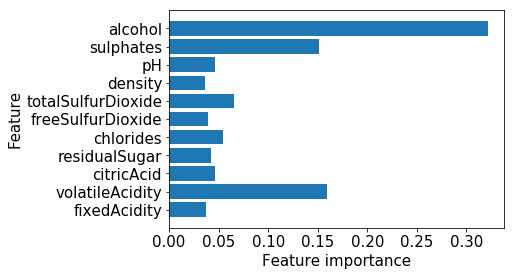

In [15]:
#Question 6
tr = DecisionTreeRegressor(max_depth=10)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
trainFit = tr.fit(X_train,y_train)

n_features = X.shape[1]
plt.barh(range(n_features), tr.feature_importances_, align='center')
plt.yticks(np.arange(n_features), np.array(wineall.columns)[:11])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)


In [16]:
#Question 7
from sklearn.ensemble import RandomForestRegressor
max_depth = [5,10,20]

for depth in max_depth:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = RandomForestRegressor(n_estimators=50,max_depth=depth).fit(X_train,y_train)
    yGuess = np.mean(y_train)
    yhatTrain = trainFit.predict(X_train)
    yhatTest  = trainFit.predict(X_test)
    mseTrain = np.mean( (y_train-yhatTrain)**2)
    mseTest  = np.mean( (y_test -yhatTest) **2)
    mseGuessTrain = np.mean( (y_train - yGuess)**2)
    mseGuessTest  = np.mean( (y_test  - yGuess)**2)
    r2Train = 1. - mseTrain/mseGuessTrain
    r2Test  = 1. - mseTest/mseGuessTest
    train_scores[i] = r2Train
    test_scores[i] = r2Test
    print("For max_depth of :{}".format(depth))
    print(r2Train)
    print(r2Test)

For max_depth of :5
0.5489866937961179
0.421531202112746
For max_depth of :10
0.8441670969155954
0.44590712616614403
For max_depth of :20
0.9226803120435133
0.4841663509408165


In [17]:
#Question 8
from sklearn.ensemble import GradientBoostingRegressor
max_depth = [5,10,20]

for depth in max_depth:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    trainFit = GradientBoostingRegressor(n_estimators=50,max_depth=depth).fit(X_train,y_train)
    yGuess = np.mean(y_train)
    yhatTrain = trainFit.predict(X_train)
    yhatTest  = trainFit.predict(X_test)
    mseTrain = np.mean( (y_train-yhatTrain)**2)
    mseTest  = np.mean( (y_test -yhatTest) **2)
    mseGuessTrain = np.mean( (y_train - yGuess)**2)
    mseGuessTest  = np.mean( (y_test  - yGuess)**2)
    r2Train = 1. - mseTrain/mseGuessTrain
    r2Test  = 1. - mseTest/mseGuessTest
    train_scores[i] = r2Train
    test_scores[i] = r2Test
    print("For max_depth of :{}".format(depth))
    print(r2Train)
    print(r2Test)

For max_depth of :5
0.7605729304212137
0.40558932414307425
For max_depth of :10
0.9985084691185052
0.44711661690618665
For max_depth of :20
0.9999734386011124
0.15354983276015333
